In [138]:
# Author: Gargi Singh, Assistant Research Scientist, TTI
# Date: 2022-03-31
# Description: This script performs geocoding using the Google Maps API

import requests
import pandas as pd
import json
import numpy as np
from datetime import datetime
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt

In [139]:
pd.set_option('display.max_columns', 150) #Don't use 'None' here, or the notebook slows down

In [164]:
## Add the access token from NOAA
Token = 'ADD-HERE'

## Austin Airport weather station
station_id = 'GHCND:USW00013904' 

In [172]:
## Initialize lists to store data
dates_temp = []
dates_prcp = []
temps = []
prcp = []

for year in range(2015, 2022):
    year = str(year)
    print('working on year '+year)
    
    #make the api call
    r = requests.get('https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=TAVG&limit=1000&stationid='+station_id+'&startdate='+year+'-01-01&enddate='+year+'-12-31', headers={'token':Token})
    #load the api response as a json
    d = json.loads(r.text)
    #get all items in the response which are average temperature readings
    max_temps = [item for item in d['results'] if item['datatype']=='TAVG']
    #get the date field from all average temperature readings
    dates_temp += [item['date'] for item in max_temps]
    #get the actual average temperature from all average temperature readings
    temps += [item['value'] for item in max_temps]

working on year 2015
working on year 2016
working on year 2017
working on year 2018
working on year 2019
working on year 2020
working on year 2021


In [173]:
## Initialize dataframe
df_temp = pd.DataFrame()

#populate date and average temperature fields (cast string date to datetime and convert temperature from tenths of Celsius to Fahrenheit)
df_temp['date'] = [datetime.strptime(d, "%Y-%m-%dT%H:%M:%S") for d in dates_temp]
df_temp['MaxTemp'] = [float(v)/10.0*1.8 + 32 for v in temps]

In [174]:
df_temp['month'] = df_temp['date'].dt.month
df_temp['day'] = df_temp['date'].dt.day

df_temp = df_temp[df_temp.month==4]

<AxesSubplot:xlabel='day', ylabel='MaxTemp'>

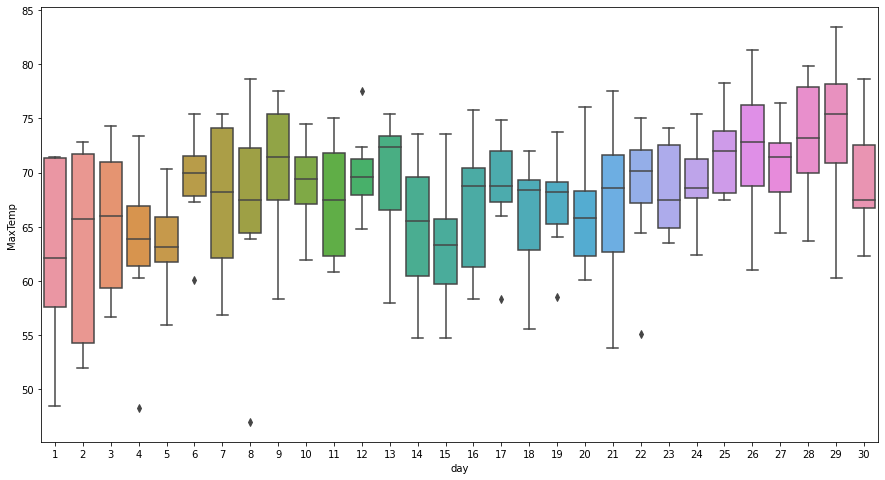

<Figure size 1080x576 with 0 Axes>

In [175]:
ax = sns.boxplot(x="day", y="MaxTemp", data=df_temp)

plt.figure(figsize = (15,8))

ax